# Exoplanet Exploratory Data Analysis (i.e. exo-eda)

In this data analysis we will analyse a list of currently known exoplanets in the
[NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/index.html),
made graciously available to the community on behalf of the KELT project team. For those who do not know, exoplanets are planets that orbit other stars, within our Milky Way galaxy and other galaxies (e.g. the Andromeda Galaxy, the Milky Way's near neighbor).

## Downloading the dataset
The best way to retrieve the data is by using the following piece of code:
It interfaces with the Exoplanet Archive's Table Access Protocol API using the PyVO python package.

In [1]:
!pip install pyvo pandas seaborn -Uq
import pandas as pd
from pyvo.dal import TAPService
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("dark")

service = TAPService("https://exoplanetarchive.ipac.caltech.edu/TAP")
results = service.search("SELECT * FROM pscomppars")
df: pd.DataFrame = results.to_table().to_pandas(index=True)

## Data Preparation and Cleaning
To be very frank, this is a large dataset. As a result there are many columns in this dataset that we
do not need and take up memory usage.
A quick look through the dataset shows the following:
- Many of the columns contain "reflinks", which HTML references to publications.
In addition, they generally are the same for each column which makes them redundant.
- On a similar note, we do not need to use links that cite the academic papers where the discovery was originally
published
- There is also some columns that contain other HTML, making them unusable (they end with `str`)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4434 entries, 0 to 4433
Columns: 373 entries, pl_name to htm20
dtypes: Int32(35), float64(180), int32(23), object(135)
memory usage: 11.8+ MB


In [3]:
# Deleting the reflinks
df.drop(columns=df.filter(like="reflink").columns, inplace=True)
# Deleting the citation link
df.drop(columns="disc_refname", inplace=True)
# Other HTML columns
# This list also contains disc_instrument, which we need and is at index 0
df.drop(columns=df.filter(like="str").columns[1:], inplace=True)

## Exploratory Data Analysis and Visualization
*Gaining an understanding of the dataset*
For an understanding of what each column refers to, please refer to the Exo

First, it would be helpful to see how many exoplanets that have been detected. It would also be useful to find if there
are any exoplanets have had their existence marked controversial (there is not enough evidence available to confirm their
existence).

In [4]:
print(f'There are {df.shape[0]} exoplanets detected')

There are 4434 exoplanets detected


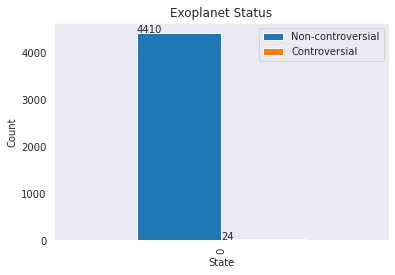

In [5]:
controv_df = pd.DataFrame(
    {"Non-controversial": (df.pl_controv_flag == 0).sum(), "Controversial": (df.pl_controv_flag == 1).sum()}, index=[0])
ax = controv_df.plot(kind="bar")
ax.set_title("Exoplanet Status")
ax.set_xlabel("Current State")
ax.set_ylabel("Count")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

Since there is a few exoplanets that are (currently) marked as controversial, to be safe, we should create a new dataframe
that only contains confirmed exoplanets.

In [6]:
non_controv_df = pd.DataFrame(df.iloc[df[df["pl_controv_flag"] == 0].index], columns=df.columns).reset_index(drop=True)

Now we can look further into the dataset and be sure that we are using confirmed data.

Here is a visualization on how many exoplanets we are discovering each year(including this year so far)

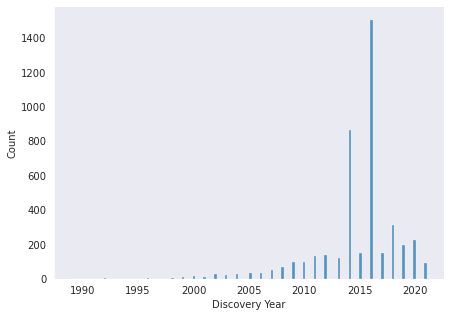

In [7]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.despine(fig)
ax.set_xlabel("Discovery Year")
sns.histplot(non_controv_df["disc_year"].value_counts(), x=non_controv_df["disc_year"].values)
plt.show()

We can also see if there are any planets that orbit multiple stars

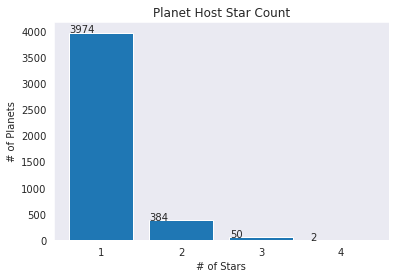

In [8]:
sys_types = non_controv_df["sy_snum"].value_counts()
ax = plt.axes()
ax.bar(sys_types.keys(), sys_types.values)
ax.set_title("Planet Host Star Count")
ax.set_ylabel("# of Planets")
ax.set_xlabel("# of Stars")
plt.xticks([1, 2, 3, 4])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

It would be interesting to see how many exoplanets orbit a star(s)

## Asking and answering questions

### Q1: Which techniques have found the most exoplanets?

***To learn more about exoplanet detection techniques, please refer to
[this awesome Wikipedia article](https://en.wikipedia.org/wiki/Methods_of_detecting_exoplanets)***

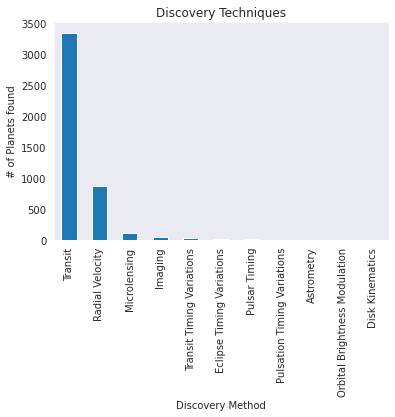

The transit method has found the most exoplanets


In [15]:
disc_method_counts = non_controv_df["discoverymethod"].value_counts()
#ax = plt.axes()
disc_method_counts.plot(kind="bar", title="Discovery Techniques", xlabel="Discovery Method",
                        ylabel="# of Planets found")
plt.show()
print(f'The {str(disc_method_counts.keys()[0]).lower()} method has found the most exoplanets')

### Q2: Which facility found the most exoplanets?

In [ ]:
non_controv_df["disc_facility"].value_counts()
#

As of writing (July 2021), the Kelper space telescope has found the most exoplanets, with over 2500 exoplanets found
(nearly half of all known exoplanets!). This includes its secondary mission, "K2" after some parts failed, reducing its
capability. It was deactivated in 2018.(It will be interesting to see how many exoplanets TESS finds as it the new
exoplanet hunting space telescope)
### Q5: How many exoplanets reside in the habitable zone of a star?

## Acknowledgements
This data is made available to the community through the Exoplanet Archive on behalf of the KELT project team.